# Regresión múltiple

Ejemplo de pipeline de preprocesado y regresión.

Objetivo: predecir price que significa precio de vivienda.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
# Para resetear el cambio de formato al original
# pd.reset_option('display.float_format')

In [3]:
df = pd.read_csv('../../data/duke-forest-nulls.csv')
df.tail(1)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
97,"2708 Circle Dr, Durham, NC 27705",674500,4,4.00,3766.00,Single Family,1955.00,"Forced air, Electric, Gas",other,0 spaces,0.73,NaN,https://www.zillow.com/homedetails/2708-Circle...


## Valores faltantes con Scikit Learn

Técnicas de imputación de valores faltantes: sklearn.impute

### Ejemplo demo

In [4]:
from sklearn.experimental import enable_iterative_imputer
# CUIDADO: enable_iterative_imputer va antes de IterativeImputer para poder usarlo
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

df = pd.DataFrame({
    'edad': [25, np.nan, 40, 35, 60, np.nan],
    'genero': ['masculino', 'femenino', np.nan, 'masculino', 'masculino', 'femenino'],
    'ingresos': [30000, 70000, np.nan, 80000, np.nan, 40000]
})

# Opción 1 SimpleImputer por media o mediana:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# df['edad'] = imp_mean.fit_transform(df[['edad']])

# Opción 2 KNNImputer: media pero de las filas más cercanas según el algoritmo de KNN
# imp_knn = KNNImputer(n_neighbors=2) # calcula la media de los n_neighbors más cercanos
# df['edad'] = imp_knn.fit_transform(df[['edad']])
# df['ingresos'] = imp_knn.fit_transform(df[['ingresos']])

# Opción 3 SimpleImputer constante: asignamos un valor fijo
# imp_constant = SimpleImputer(strategy='constant', fill_value='other')
# df['genero'] = imp_constant.fit_transform(df[['genero']])

# Opción 4 SimpleImputer con el valor más frecuente (moda) 
# imp_mode = SimpleImputer(strategy='most_frequent')
# df['genero'] = imp_mode.fit_transform(df[['genero']])

# Opción 5 IterativeImputer con una predicción utilizando una regresión
imp_iter = IterativeImputer(random_state=42)
df['ingresos'] = imp_iter.fit_transform(df[['ingresos']])

df.head()

,edad,genero,ingresos
0,25.00,masculino,30000.00
1,NaN,femenino,70000.00
2,40.00,NaN,55000.00
3,35.00,masculino,80000.00
4,60.00,masculino,55000.00


### Ejemplo duke forest

In [5]:
df = pd.read_csv('../../data/duke-forest-nulls.csv')

df.isnull().sum()

address        0
price          0
bed            0
bath           0
area           2
type           2
year_built     4
heating        1
cooling        1
parking        0
lot            1
hoa           97
url            0
dtype: int64

In [6]:
df.head(2)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.00,6040.00,Single Family,1972.00,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.00,4475.00,Single Family,1969.00,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...


In [7]:
df['type'].value_counts()

Single Family    96
Name: type, dtype: int64

In [8]:
df['parking'].value_counts()

0 spaces                                                     42
Carport, Covered                                             11
Garage - Attached, Covered                                   10
Garage - Attached                                            10
Covered                                                       4
Carport, Garage - Attached, Covered                           3
Off-street, Covered                                           2
Garage, Garage - Detached, Covered                            2
Garage - Attached, Garage - Detached, Covered                 2
Garage, Carport, Covered                                      2
Garage                                                        2
Garage - Detached, Off-street, Covered                        1
Garage, Garage - Detached, Off-street, Covered                1
Garage, Garage - Detached, Off-street, On-street, Covered     1
Off-street                                                    1
Garage, Garage - Detached, Off-street   

In [9]:
# parking se puede procesar con pandas e intentar sacar el número de plazas
df = df.drop(['address', 'hoa', 'url', 'type', 'parking'], axis=1)
df.head(2)

,price,bed,bath,area,year_built,heating,cooling,lot
0,1520000,3,4.00,6040.00,1972.00,"Other, Gas",central,0.97
1,1030000,5,4.00,4475.00,1969.00,"Forced air, Gas",central,1.38


In [10]:
numeric_cols  = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print(numeric_cols)
print(categorical_cols)

# IterativeImputer a numéricas
df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])

# SimpleImputer most_frequent a categóricas
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

Index(['price', 'bed', 'bath', 'area', 'year_built', 'lot'], dtype='object')
Index(['heating', 'cooling'], dtype='object')


price         0
bed           0
bath          0
area          0
year_built    0
heating       0
cooling       0
lot           0
dtype: int64

## EDA

* pairplot
* heatmap
* scatterplot

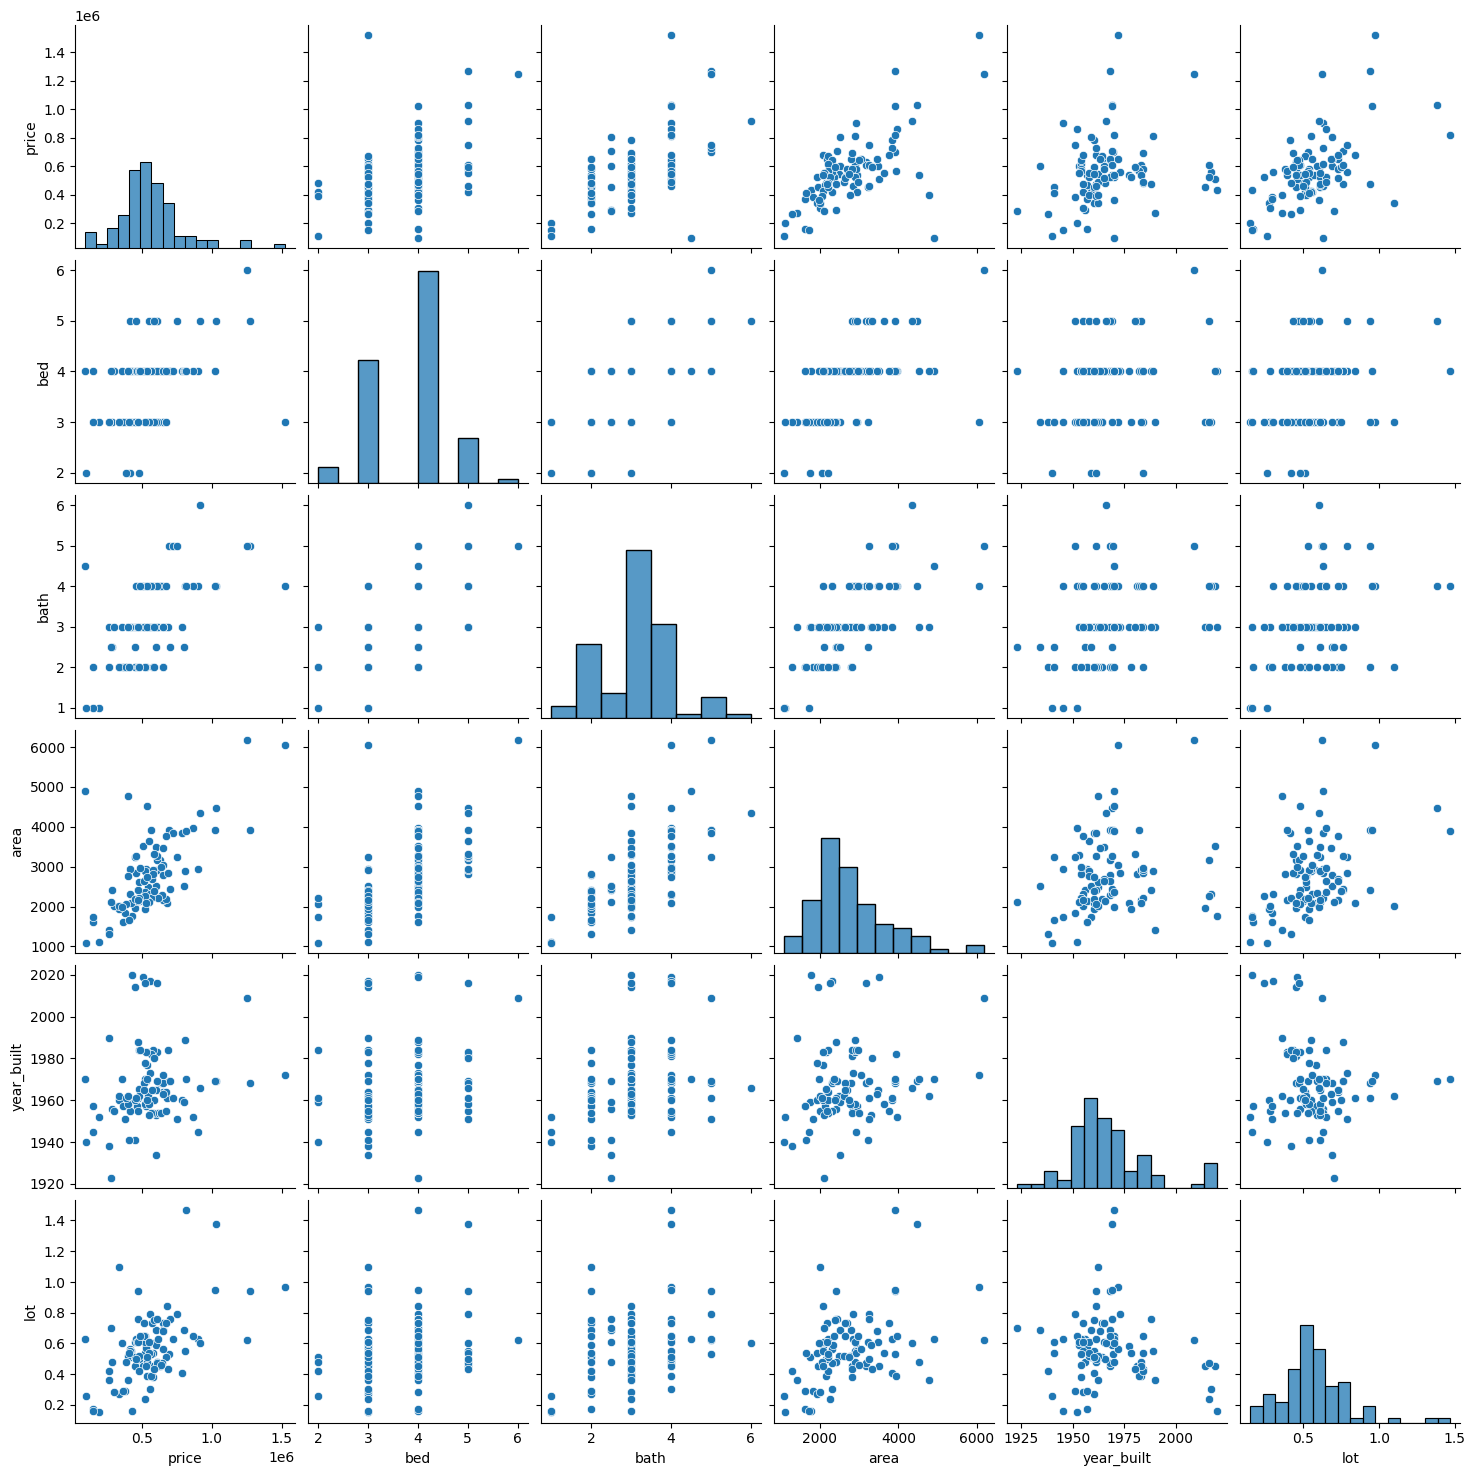

In [11]:
sns.pairplot(df)

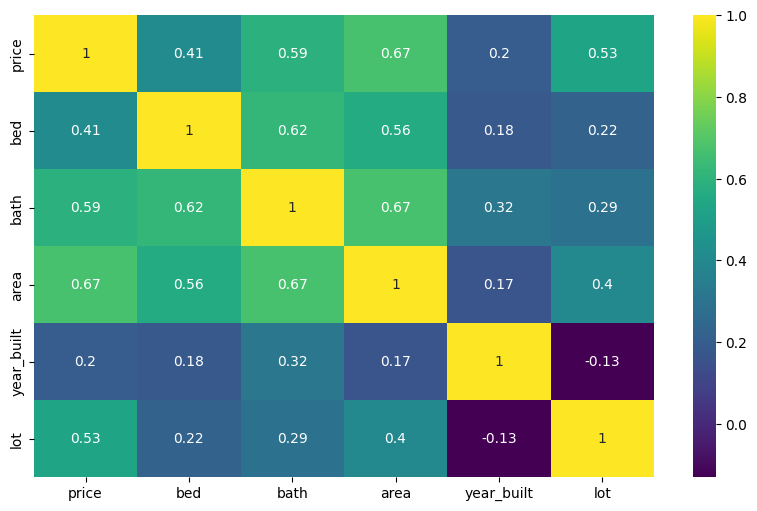

In [12]:
plt.figure(figsize=(10, 6))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

<Axes: xlabel='area', ylabel='price'>

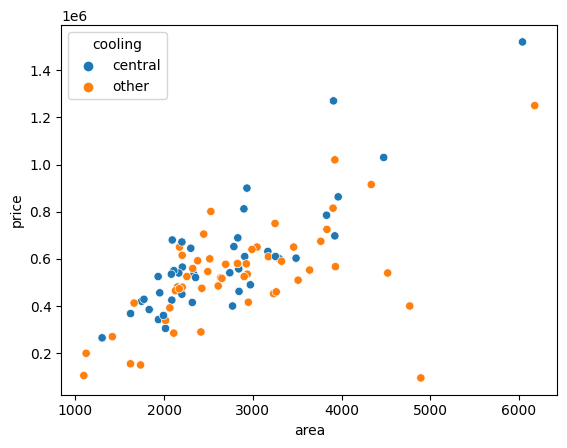

In [13]:
sns.scatterplot(data=df, x='area', y='price', hue='cooling')

<Axes: xlabel='area', ylabel='price'>

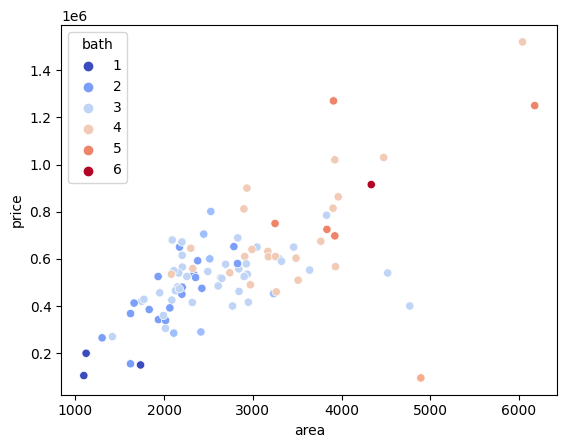

In [14]:
sns.scatterplot(data=df, x='area', y='price', hue='bath', palette='coolwarm')

## Codificación categórico a numérico

In [15]:
from sklearn.preprocessing import OneHotEncoder

# equivalente a get_dummies de pandas

df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

### Estrategia 1

Contar el número de sistemas de calefacción

In [16]:
df['heating_int'] = df['heating'].str.split(',').apply(len)

<Axes: xlabel='area', ylabel='price'>

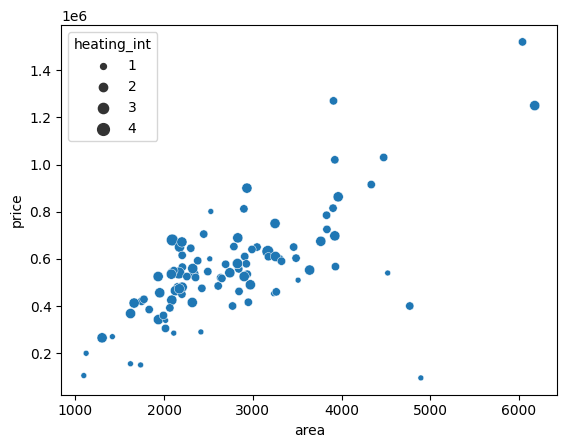

In [17]:
sns.scatterplot(data=df, x='area', y='price', size='heating_int')

In [18]:
# Opción 2: función personalizada para tratar la columna heating
df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

### Estrategia 2

Crear una función para separar en grupos utilizando estructuras de control: if, elif, else.

Otra opción es quedarse solo con el primer sistema de calefacción que aparece.

In [19]:
def classify_heating(heating):

    # if 'No Data' in heating:
    #     return 'No Data'
    # elif 'Other' == heating:
    #     return 'Other'
    # elif ',' in heating:
    #     return 'Mixed'
    # else:
    #     return 'Other'

    return heating.split(',')[0]
    
df['heating_int'] = df['heating'].apply(classify_heating)
df['heating_int'].value_counts()

Forced air    61
Other         26
Heat pump      8
No Data        2
Baseboard      1
Name: heating_int, dtype: int64

<Axes: xlabel='area', ylabel='price'>

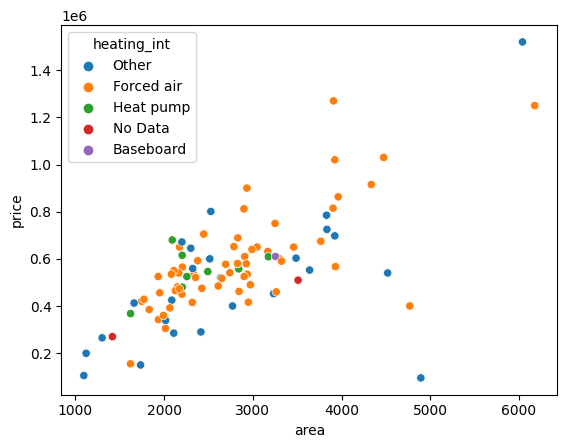

In [20]:
sns.scatterplot(data=df, x='area', y='price', hue='heating_int')

In [21]:
df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

### Estrategia 3

Crear una nueva columna por cada sistema de calefacción.

Similar al funcionamiento de get_dummies o OneHotEncoder.

In [22]:
# Otra estrategia: crear una columna nueva por cada posible sistema de calefacción
heating_types = ['Forced air', 'Gas', 'Electric', 'Other', 'Heat pump', 'No Data', 'Radiant', 'Wood / Pellet', 'Baseboard' ]

for heating_type in heating_types:
    # heating_type in x devuelve un True o False
    # int(heating_type in x) devuelve 1 si True o 0 si False
    df[heating_type] = df['heating'].apply(lambda x: int(heating_type in x))

df.head()

,price,bed,bath,area,year_built,heating,cooling,lot,heating_int,Forced air,Gas,Electric,Other,Heat pump,No Data,Radiant,Wood / Pellet,Baseboard
0,1520000.00,3.00,4.00,6040.00,1972.00,"Other, Gas",central,0.97,Other,0,1,0,1,0,0,0,0,0
1,1030000.00,5.00,4.00,4475.00,1969.00,"Forced air, Gas",central,1.38,Forced air,1,1,0,0,0,0,0,0,0
2,420000.00,2.00,3.00,1745.00,1959.00,"Forced air, Gas",central,0.51,Forced air,1,1,0,0,0,0,0,0,0
3,680000.00,4.00,3.00,2091.00,1961.00,"Heat pump, Other, Electric, Gas",central,0.84,Heat pump,0,1,1,1,1,0,0,0,0
4,428500.00,4.00,3.00,1772.00,2020.00,"Forced air, Gas",central,0.16,Forced air,1,1,0,0,0,0,0,0,0


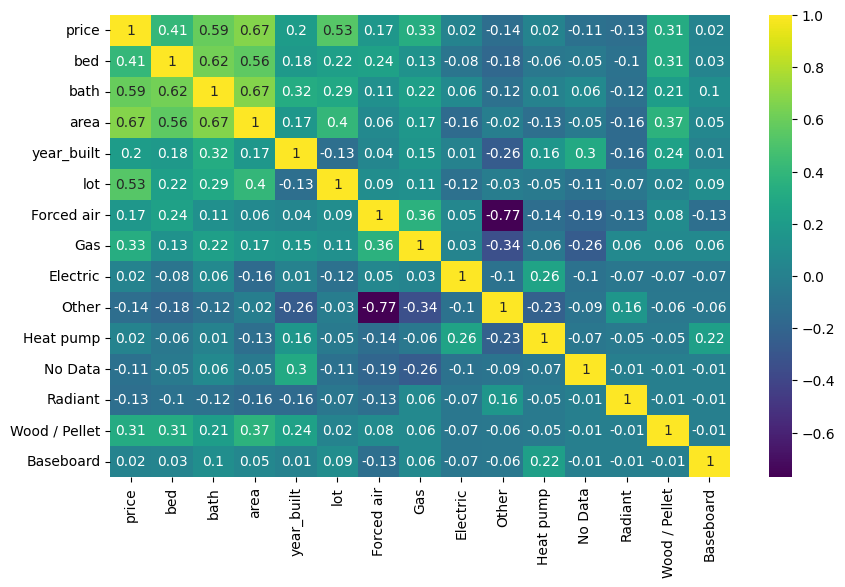

In [23]:
plt.figure(figsize=(10, 6))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [24]:
def plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test):

    resid_train = y_train - y_predictions_train # residuos entrenamiento
    resid_test = y_test - y_predictions_test # residuos test

    # LOWESS realiza un suavizado y ajuste de curvas para ayudar a detectar alguna tendencia en los residuos
    sns.residplot(x=y_predictions_train, y=resid_train, color='b', lowess=True)
    plt.title('Residuos en entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    sns.residplot(x=y_predictions_test, y=resid_test, color='r', lowess=True)
    plt.title('Residuos en test')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

## Preparar DataFrame de resultados

* Nombre Modelo
* MAE train
* RMSE train
* MAE test
* RMSE test

In [25]:
df_results = pd.DataFrame(columns=['model_name', 'mae_train', 'rmse_train', 'mae_test', 'rmse_test'])

## Regresión lineal simple

1 feature/característica de entrada.

Elegimos area por ser la más correlacionada con price

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# train
y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

# test
y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

# guardar resultados: append está deprecado
# df_results.append({
#     'model_name': 'Regresión lineal simple con área',
#     'mae_train': mae_train,
#     'rmse_train': rmse_train,
#     'mae_test': mae_test,
#     'rmse_test': rmse_test
# }, ignore_index=True)

new_row = {
    'model_name': 'Regresión lineal simple con área',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20


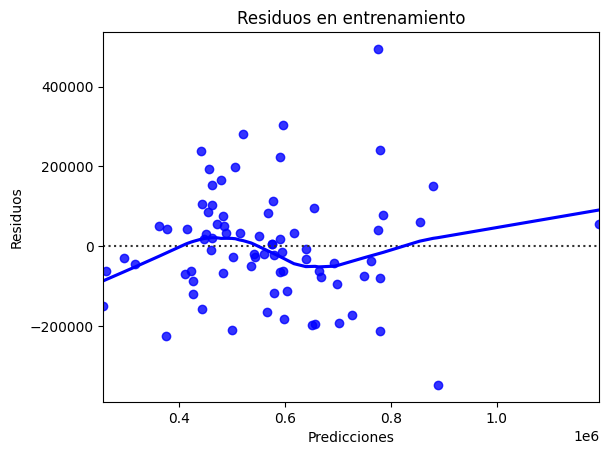

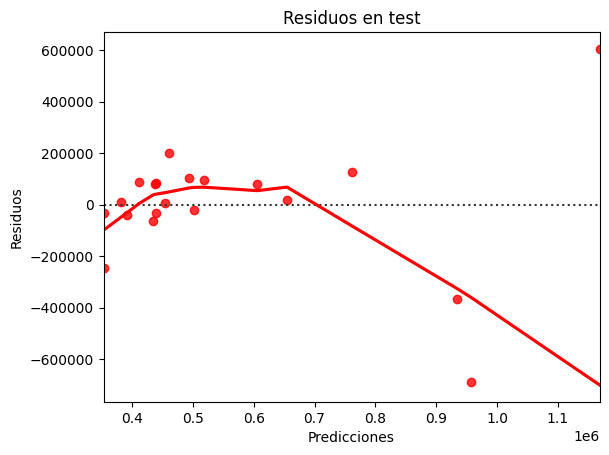

In [27]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

In [28]:
X = df[['bath']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal simple con bath',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20


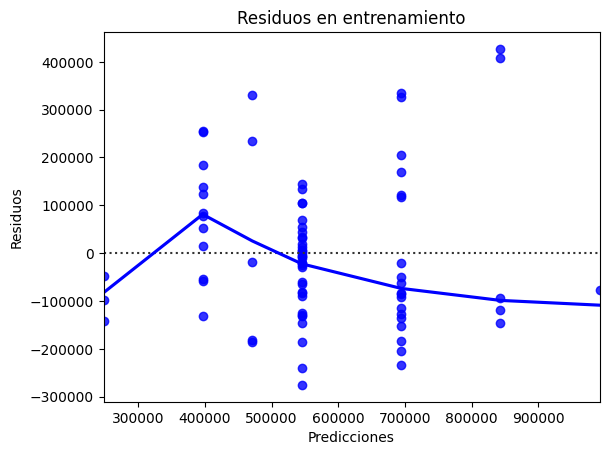

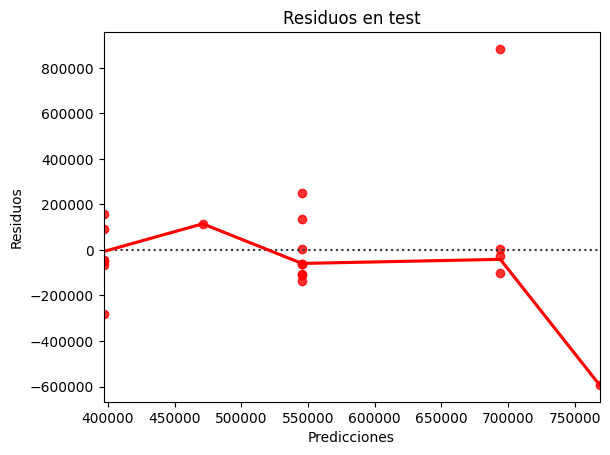

In [29]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Regresión lineal simple polinómica

In [30]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

preprocessor = PolynomialFeatures(degree=3)
X_train = preprocessor.fit_transform(X_train) # fit_transform ajusta el preprocessor a los datos train y los transforma
X_test = preprocessor.transform(X_test) # transform transforma los datos de test utilizando parámetros ya calculados en train

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal simple polinómica grado 3 con area',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20
2,Regresión lineal simple polinómica grado 3 con...,99310.77,134917.47,137713.17,237310.49


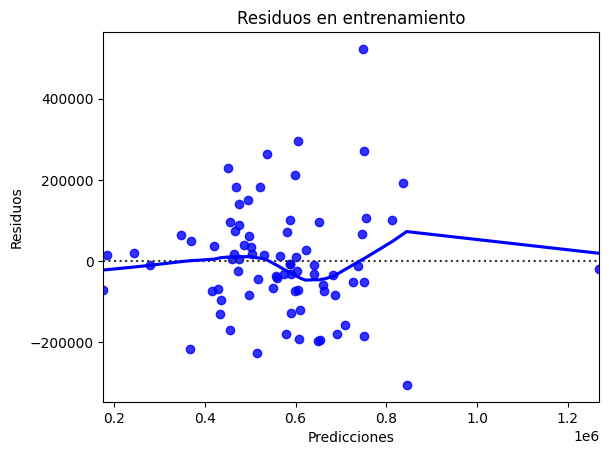

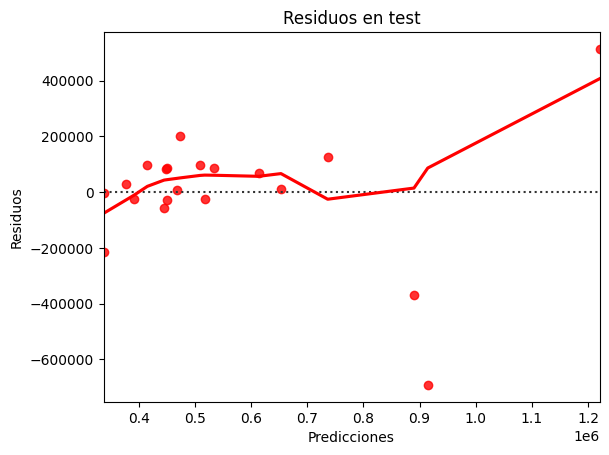

In [31]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Regresión lineal múltiple

Variables con más correlación:

* area
* bath
* lot
* bed

In [32]:
X = df[['area', 'bath', 'lot', 'bed']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal múltiple 4 features',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20
2,Regresión lineal simple polinómica grado 3 con...,99310.77,134917.47,137713.17,237310.49
3,Regresión lineal múltiple 4 features,94393.28,117809.48,147893.63,233403.27


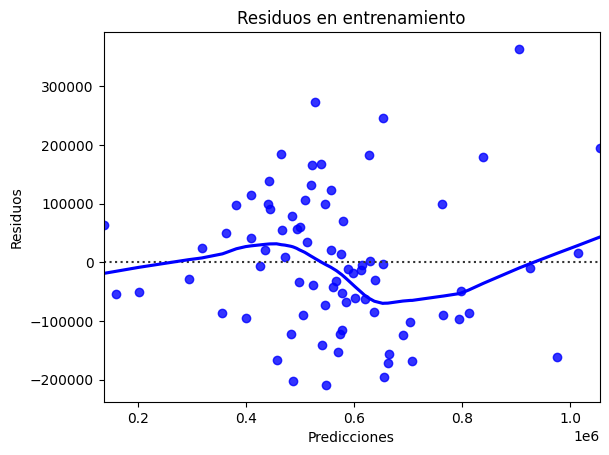

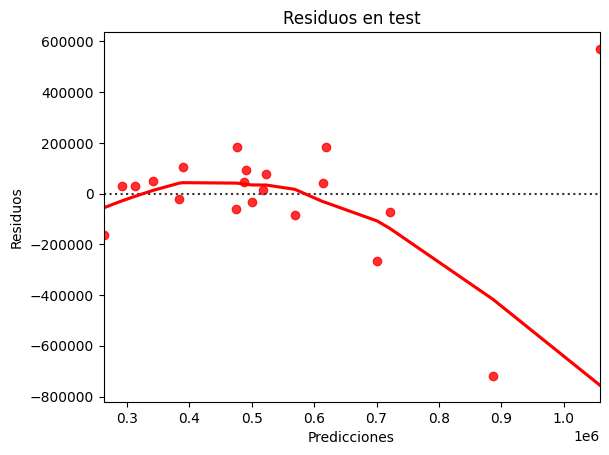

In [33]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Regresión lineal múltiple con todas las columnas

In [34]:
# X = df.drop(['price', 'heating', 'cooling', 'heating_int'], axis=1) # Todas las columnas menos price
X = df.select_dtypes(include=np.number).drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal múltiple 14 features',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20
2,Regresión lineal simple polinómica grado 3 con...,99310.77,134917.47,137713.17,237310.49
3,Regresión lineal múltiple 4 features,94393.28,117809.48,147893.63,233403.27
4,Regresión lineal múltiple 14 features,79070.67,106623.76,142229.64,224248.55


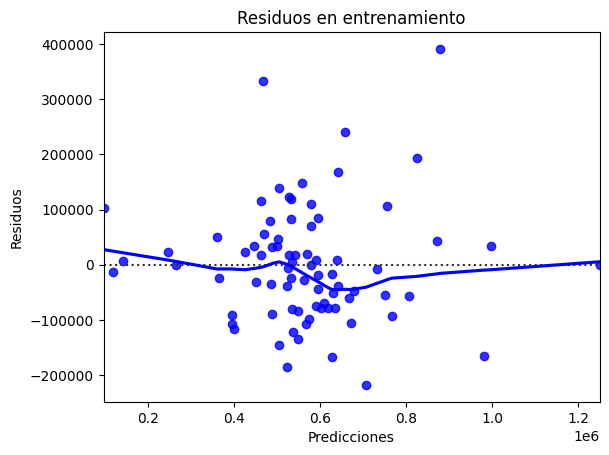

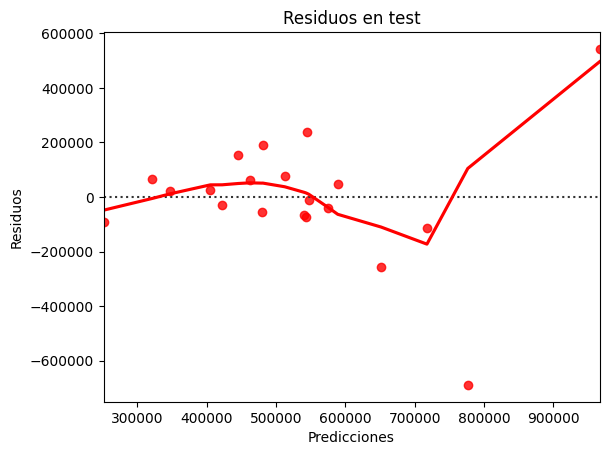

In [35]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Regresión lineal múltiple polinómica

In [36]:
df.columns

Index(['price', 'bed', 'bath', 'area', 'year_built', 'heating', 'cooling',
       'lot', 'heating_int', 'Forced air', 'Gas', 'Electric', 'Other',
       'Heat pump', 'No Data', 'Radiant', 'Wood / Pellet', 'Baseboard'],
      dtype='object')

In [37]:
# X = df.drop(['price', 'heating', 'cooling', 'heating_int'], axis=1) # Todas las columnas menos price
# X = df[['bed', 'bath', 'area', 'year_built', 'lot']]
X = df[['area', 'lot', 'year_built', 'bath']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

preprocessor = PolynomialFeatures(degree=2)
X_train = preprocessor.fit_transform(X_train) # fit_transform ajusta el preprocessor a los datos train y los transforma
X_test = preprocessor.transform(X_test) # transform transforma los datos de test utilizando parámetros ya calculados en train

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal múltiple polinomial grado 2 y 4 features',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row


df_results.head(10)

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20
2,Regresión lineal simple polinómica grado 3 con...,99310.77,134917.47,137713.17,237310.49
3,Regresión lineal múltiple 4 features,94393.28,117809.48,147893.63,233403.27
4,Regresión lineal múltiple 14 features,79070.67,106623.76,142229.64,224248.55
5,Regresión lineal múltiple polinomial grado 2 y...,75405.16,97533.08,127943.14,211982.71


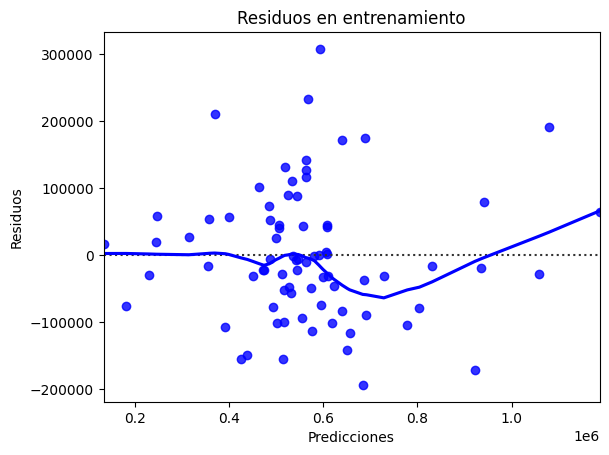

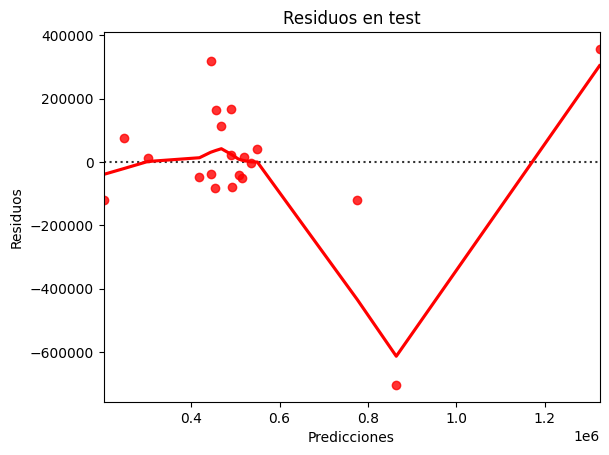

In [38]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Regresión regularizada

Modelo de regresión especializada para prevenir overfitting.

In [39]:
from sklearn.linear_model import ElasticNet

X = df.select_dtypes(include=np.number).drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = ElasticNet(alpha=1.5)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión ElasticNet',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head(20)

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con área,102805.60,136871.73,146100.12,254359.20
1,Regresión lineal simple con bath,118541.16,151547.78,171653.56,267820.20
2,Regresión lineal simple polinómica grado 3 con...,99310.77,134917.47,137713.17,237310.49
3,Regresión lineal múltiple 4 features,94393.28,117809.48,147893.63,233403.27
4,Regresión lineal múltiple 14 features,79070.67,106623.76,142229.64,224248.55
5,Regresión lineal múltiple polinomial grado 2 y...,75405.16,97533.08,127943.14,211982.71
6,Regresión ElasticNet,94486.46,126888.76,141017.27,246026.75


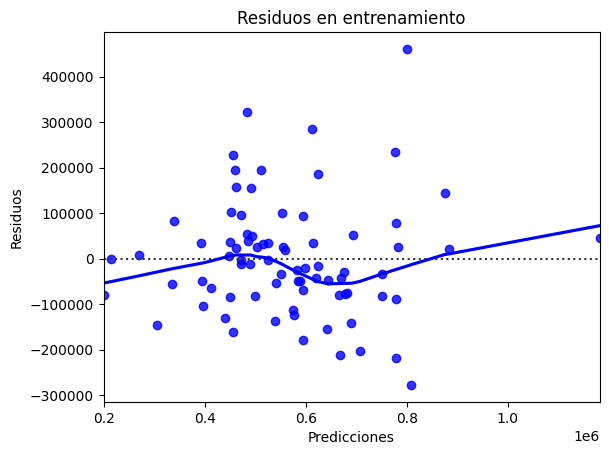

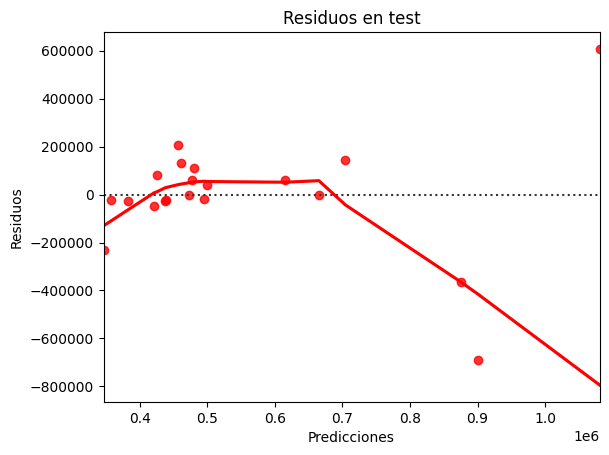

In [40]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

## Comparación de resultados

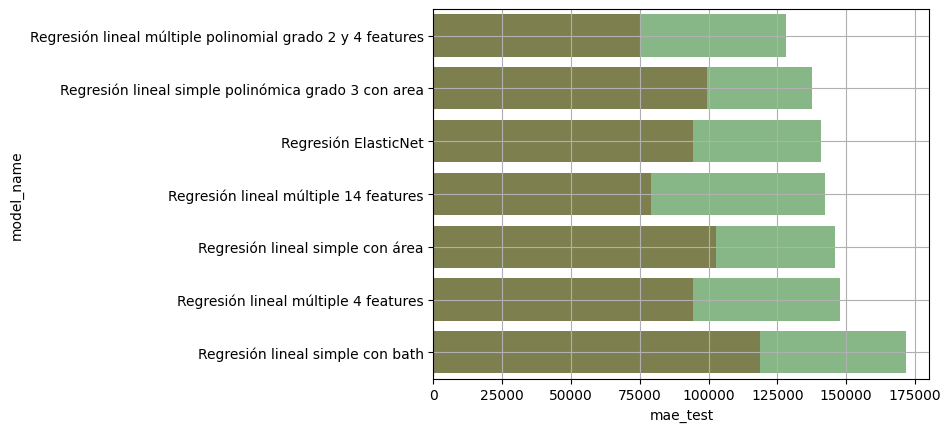

In [49]:
# Gráfico de barras mae_train vs mae_test de df_results
df_results.head(15)

df_results = df_results.sort_values('mae_test')

sns.barplot(data=df_results, x='mae_train', y='model_name', color='red', alpha=0.5)

sns.barplot(data=df_results, x='mae_test', y='model_name', color='green', alpha=0.5)

plt.grid()